# Define Problem
`we want to clustering pictures of flowers (semi-superwised).`

## preprocessing
at first, the drive is connected to drive to read data from the drive and extract features and do clustering on features

In [1]:

from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [162]:
PATH = "/content/drive/MyDrive/AI-CA03/flower_images/"
import os as os
import pandas as pd
import cv2 as cv
import numpy as np
from sklearn.decomposition import PCA

In [146]:
data_names = os.listdir(PATH)
data_dict = {}
label_dict = {}
labels = pd.read_csv(PATH + "flower_labels.csv")

In [147]:
from keras.preprocessing import image
from keras.applications.vgg16 import VGG16

### here the pretraind model is used abd the coefs are coefs of imagenet vgg16

In [148]:
model  = VGG16(weights='imagenet')

### pictures are read by keras preprocessing and they have been converted to an array then they enter the model for feature extraction

In [156]:
data_list = []
for name in data_names:
  if (name.split('.')[-1] == "png"):
    picture = image.load_img(PATH+name ,color_mode='rgb', target_size=(224, 224) )
    picture = image.img_to_array(picture)
    picture = np.expand_dims(picture , axis = 0)
    features = model.predict(picture)
    print(features.shape)
    data_list.append(np.array(features))

    data_dict[int(name.split('.')[0])] = features
    label_dict[int(name.split('.')[0])] = labels['label'].iloc[int(name.split('.')[0]) -1]


1/1 [==============================] - 1s 1s/step
(1, 1000)
1/1 [==============================] - 1s 861ms/step
(1, 1000)
1/1 [==============================] - 1s 839ms/step
(1, 1000)
1/1 [==============================] - 1s 867ms/step
(1, 1000)
1/1 [==============================] - 1s 856ms/step
(1, 1000)
1/1 [==============================] - 1s 828ms/step
(1, 1000)
1/1 [==============================] - 1s 521ms/step
(1, 1000)
1/1 [==============================] - 1s 532ms/step
(1, 1000)
1/1 [==============================] - 1s 528ms/step
(1, 1000)
1/1 [==============================] - 1s 519ms/step
(1, 1000)
1/1 [==============================] - 1s 533ms/step
(1, 1000)
1/1 [==============================] - 1s 513ms/step
(1, 1000)
1/1 [==============================] - 1s 526ms/step
(1, 1000)
1/1 [==============================] - 1s 516ms/step
(1, 1000)
1/1 [==============================] - 1s 844ms/step
(1, 1000)
1/1 [==============================] - 1s 850ms/step
(1, 1

In [157]:
data_list[0].shape

(1, 1000)

In [158]:
data_list = [x[0,:] for x in data_list]

In [163]:
from sklearn.cluster import k_means

## k means algorithem

at first we calculate optimal K and as it has shown in graph at point 10 we have ebow
because of the data this ebow isnt very nice

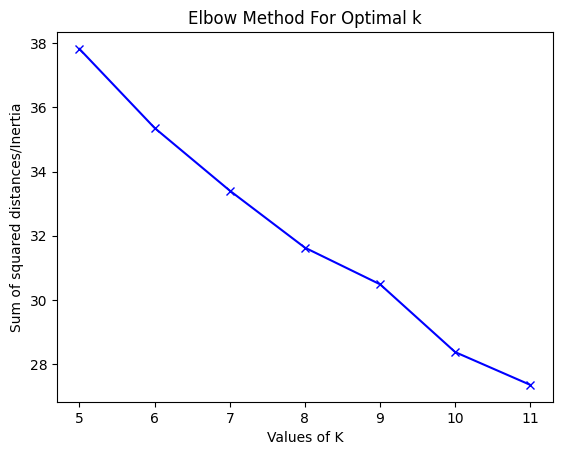

In [169]:
Sum_of_squared_distances = []
K = range(5,12)
for num_clusters in K :
 _ , kmeans , inertia = k_means(data_list ,  n_clusters=num_clusters)
 Sum_of_squared_distances.append(inertia)
plt.plot(K,Sum_of_squared_distances,'bx-')
plt.xlabel('Values of K')
plt.ylabel('Sum of squared distances/Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

#### so lets clustering at k = 10

In [174]:
centroids, k_means_pred_labels,interia = k_means(data_list,n_clusters=10)

In [175]:
print(k_means_pred_labels)

[7 8 6 6 8 8 0 8 0 6 0 3 7 8 7 3 3 2 6 7 1 8 8 8 8 7 9 1 8 9 8 2 7 3 3 7 5
 9 8 7 2 0 8 1 8 1 0 8 0 1 3 8 8 0 0 8 1 8 8 8 8 3 7 8 0 8 0 2 8 8 8 8 5 8
 4 4 8 8 1 1 8 7 0 2 8 7 1 3 8 2 7 9 6 5 1 2 3 8 8 8 3 3 0 8 8 3 8 8 5 8 1
 8 6 0 8 1 8 8 3 3 4 3 3 6 7 4 0 0 8 5 8 0 8 0 0 0 3 3 3 8 0 8 0 8 8 3 1 8
 3 8 4 3 8 8 8 8 7 3 8 3 8 0 2 3 2 0 1 7 8 8 2 8 1 2 8 3 1 9 8 8 3 1 8 3 7
 8 5 0 3 8 8 8 8 8 8 5 8 8 3 8 8 6 8 1 8 7 0 7 8 8]


In [176]:
labels  = [x for x in label_dict.values()]
print(labels)

[5, 1, 6, 6, 9, 7, 2, 8, 4, 7, 4, 7, 8, 1, 9, 8, 0, 1, 6, 9, 2, 3, 3, 5, 6, 2, 0, 9, 9, 1, 8, 8, 8, 1, 3, 0, 0, 1, 6, 5, 8, 4, 2, 2, 5, 2, 2, 3, 4, 7, 6, 1, 9, 4, 2, 9, 8, 8, 3, 6, 5, 0, 8, 5, 4, 3, 4, 1, 5, 1, 9, 0, 6, 7, 9, 9, 0, 3, 2, 2, 8, 0, 4, 8, 1, 3, 6, 7, 3, 8, 3, 0, 2, 6, 2, 8, 0, 1, 5, 6, 7, 0, 4, 5, 3, 9, 6, 9, 9, 9, 2, 1, 6, 4, 0, 2, 7, 5, 8, 3, 5, 3, 7, 6, 8, 5, 2, 4, 3, 1, 5, 4, 5, 4, 4, 4, 0, 8, 9, 5, 4, 3, 4, 6, 1, 7, 7, 5, 6, 5, 0, 8, 1, 3, 3, 0, 3, 7, 6, 8, 5, 4, 8, 8, 8, 4, 5, 8, 6, 5, 1, 5, 2, 1, 5, 0, 2, 0, 1, 6, 0, 2, 6, 3, 0, 3, 8, 4, 7, 0, 5, 3, 5, 7, 9, 6, 8, 1, 9, 1, 8, 6, 3, 2, 6, 5, 4, 7, 9, 0]


from sklearn.metrics.cluster import homogeneity_score,silhouette_score
print(f"homogeneity score of kmeans: {homogeneity_score(labels,k_means_pred_labels)}")
print(f"silhouette score of kmeans: {silhouette_score(data_list,k_means_pred_labels)}")

## reduction
### we reduce dimension of array in the way we can map them to a cordinate in decartian plane in 2D display and vissualize the result

In [177]:
reduced_vectors = PCA(n_components=2).fit_transform(data_list)

In [178]:
import matplotlib.pyplot as plt


### plot for result of k-means

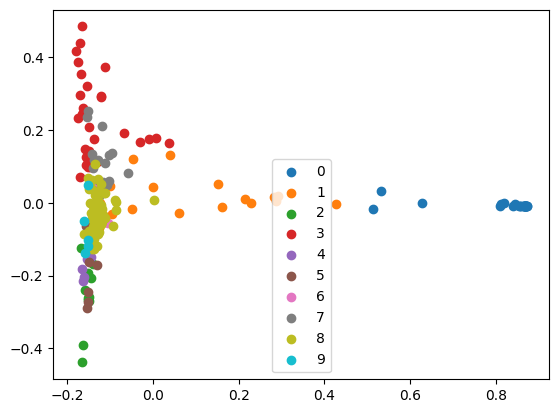

In [179]:
u_labels = list(range(10))
for i in u_labels:
    x = []
    y= []
    for j in range(len(reduced_vectors)):
      if (k_means_pred_labels[j] == i):
        x.append(reduced_vectors[j][0])
        y.append(reduced_vectors[j][1])
    plt.scatter(x , y , label = i)
plt.legend()
plt.show()

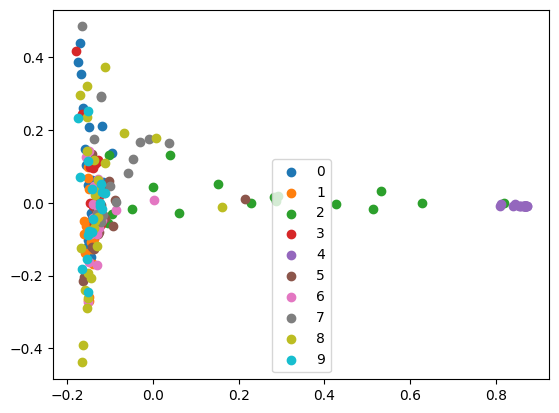

In [180]:
u_labels = list(range(10))
for i in u_labels:
    x = []
    y= []
    for j in range(len(reduced_vectors)):

      if (labels[j] == i):
        x.append(reduced_vectors[j][0])
        y.append(reduced_vectors[j][1])
    plt.scatter(x , y , label = i)
plt.legend()
plt.show()

## dbscan
### In this section we cluster data using the dbscan algorithm cluster at first we normalize data then they enter to dbscan model and db scan has very low accuracy in this awful data

In [183]:
from sklearn.cluster import DBSCAN

In [184]:
from sklearn import preprocessing

In [187]:
data_list = [preprocessing.normalize([x]) for x in data_list]

In [188]:
data_list[0].shape

(1, 1000)

In [189]:
data_list = [x[0,:] for x in data_list]

In [190]:
data_list[0].shape

(1000,)

In [191]:
db_train_clusters = DBSCAN(eps = 0.5896).fit_predict(data_list)
print(db_train_clusters)
print(max(db_train_clusters))

[-1 -1  0 -1 -1 -1  1 -1  1  0  1  2  3 -1 -1  2  2  4  0  3  2 -1 -1 -1
  5  3  6 -1 -1  6 -1  4 -1  2 -1  3  7  6  9  3  4  1 -1  1 -1  1  1 -1
  1 -1  2 -1  2  1  1  5 -1  6 -1 -1 -1  2  3 -1  1 -1  1  4 -1 -1  5 -1
  7 -1  8  8 -1 -1  1 -1 -1  2  1  4 -1  3 -1 -1 -1  4 -1  6  0 -1 -1  4
 -1  2 -1 -1  2 -1  1 -1 -1  2 -1 -1  7 -1  1 -1  0  1  9 -1 -1 -1  2  2
  8 -1  2  0  3  8  1  1 -1  7  9  1  9  1  1  1  2  2  2 -1  1 -1  1 -1
 -1 -1 -1  9  2  9  8 -1 -1 -1 -1 -1  3  2  5  2 -1  1  4  2  4  1 -1  3
 -1 -1 -1 -1  1  4 -1  2 -1  6  5 -1  2  1 -1  2 -1 -1  7  1  2 -1 -1 -1
 -1 -1 -1  7 -1 -1  2 -1 -1  0 -1 -1 -1  3  1 -1  8 -1]
9


In [192]:
print(f"homogeneity score of kmeans: {homogeneity_score(labels,db_train_clusters)}")
print(f"silhouette score of kmeans: {silhouette_score(data_list,db_train_clusters)}")

homogeneity score of kmeans: 0.3019544183461196
silhouette score of kmeans: 0.23027268657586886


#### the result of dbscan clustering

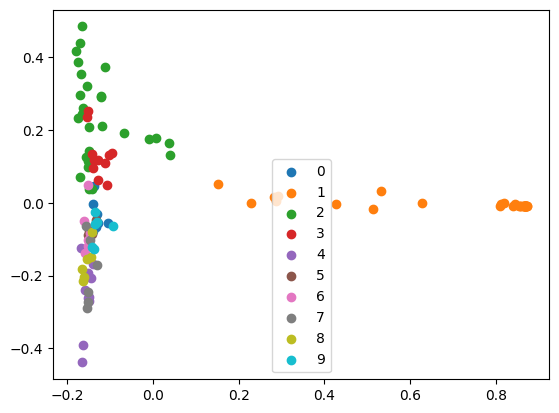

In [193]:
u_labels = list(range(10))
for i in u_labels:
    x = []
    y= []
    for j in range(len(reduced_vectors)):
      if (db_train_clusters[j] == i):
        x.append(reduced_vectors[j][0])
        y.append(reduced_vectors[j][1])
    plt.scatter(x , y , label = i)
plt.legend()
plt.show()

# questions
## 1. We are using features because using features has better results and it is possible that the intensity of pixels be different at the colors, etc but features like patterns make classify easier
## 2. Feature Extraction uses an object-based approach to classify imagery, where an object (also called segment) is a group of pixels with similar spectral, spatial, and/or texture attributes. Traditional classification methods are pixel-based, meaning that spectral information in each pixel is used to classify imagery. three methods are Histogram of Oriented Gradients (HOG) for object detection, Local Binary Patterns (LBP) for texture analysis, and Color Histograms for color information
## 3. "garbage in garbage out" At first data should be good here it's not then we should denoise pictures and remove additional things like useless pad then we can use them in the superior layers
### 4. K-Means tends to work well when the data is well-separated and evenly distributed, while DBSCAN is better suited for datasets with irregular shapes or varying densities
### 5. using elbow rules that descibed above
### 6. boath are shiiiiit but k means is better as you can see in deagrams
### 7. Principal component analysis (PCA) is a statistical technique to reduce the dimensionality of complex, high-volume datasets by extracting the principal components that contain the most information and rejecting noise or less important data while preserving all the crucial details
### 8. Silhouette Score is a tool for assessing the appropriateness of clustering results by providing a quantitative measure of how well-defined and distinct the clusters are . The homogeneity score is a metric to measure the homogeneity of a clustering. A clustering result satisfies homogeneity if all of its clusters contain only data points which are members of a single class. The metric is not symmetric, therefore swapping preds and target yields a different
### 9. It is printed above
### 10. improve data, use better preprocessing and dont be silly